In [1]:
from scapy.all import *

# THE PCAP

In [2]:
filename = "pcapfile.pcap"
file  = rdpcap(filename)
type(file)


scapy.plist.PacketList

# Check1

In [3]:
# file[0].psrc
# file[0].pdst
file[0].type 
# file[0].dst
# file[0].src
# file[0].ptype
file[0].show()
pac = file[0]
print(pac)
# print(pac.proto)

###[ Ethernet ]### 
  dst       = 52:54:00:12:35:00
  src       = 08:00:27:79:b2:2e
  type      = ARP
###[ ARP ]### 
     hwtype    = 0x1
     ptype     = IPv4
     hwlen     = 6
     plen      = 4
     op        = who-has
     hwsrc     = 08:00:27:79:b2:2e
     psrc      = 10.0.2.15
     hwdst     = 00:00:00:00:00:00
     pdst      = 10.0.2.1



b"RT\x00\x125\x00\x08\x00'y\xb2.\x08\x06\x00\x01\x08\x00\x06\x04\x00\x01\x08\x00'y\xb2.\n\x00\x02\x0f\x00\x00\x00\x00\x00\x00\n\x00\x02\x01"


# sinun

In [4]:
j = 0 
e = True
proto = PacketList()
scapy.plist.PacketList
if e == True:
    for i in range(len(file)):
        # if
        # print(i)
        # file[0].show()

        if(file[i].type == 2048 and file[i].proto == 6 and e):
            proto.append(file[i])
            

            j = i 
            #e = False
            # file[i].show

file[j].show()

        

###[ Ethernet ]### 
  dst       = 08:00:27:79:b2:2e
  src       = 52:54:00:12:35:00
  type      = IPv4
###[ IP ]### 
     version   = 4
     ihl       = 5
     tos       = 0x0
     len       = 40
     id        = 51423
     flags     = 
     frag      = 0
     ttl       = 255
     proto     = tcp
     chksum    = 0x9b04
     src       = 13.110.62.111
     dst       = 10.0.2.15
     \options   \
###[ TCP ]### 
        sport     = https
        dport     = 58632
        seq       = 601820
        ack       = 3296487992
        dataofs   = 5
        reserved  = 0
        flags     = A
        window    = 31345
        chksum    = 0x9919
        urgptr    = 0
        options   = ''
###[ Padding ]### 
           load      = '\x00\x00\x00\x00\x00\x00'



# Check2

In [5]:
# file[j].psrc
# file[0].pdst
# file[j].type
# file[j].proto
# file[j].dport
# file[0].dst
# file[0].src
# file[0].ptype
type(proto)
# proto[0].show()
print(len(proto))
# file[j].show()
# print(proto[0])

# print(proto[0][IP].dst)
proto[0].time



3077


Decimal('1641302030.621010')

In [7]:

ing = 0
f = set()
ips = set()
for i in proto: 
    packetI = i
    sp = packetI.sport
    dp = packetI.dport
    prtcl = packetI.proto
    sIp = packetI[IP].src
    dIp = packetI[IP].dst
    tupleI = (sIp,dIp,sp,dp,prtcl)
    if ing == 0:
        print(tupleI)
        ing = ing + 1
    f.add(tupleI)
    # flows.append(flow)
    # flow = []

print(len(f))
# f
# print(f)
# f







    

('10.0.2.15', '151.101.16.193', 53506, 443, 6)
160


In [8]:
flow = PacketList()
flows = {}

for i in f:
    for j in proto:
        fiveT = i
        sIp = fiveT[0]
        dIp = fiveT[1]
        sp = fiveT[2]
        dp = fiveT[3]
        prtcl = fiveT[4]
        if sIp == j[IP].src and dIp == j[IP].dst and sp == j.sport and dp == j.dport and prtcl == j.proto:
            flow.append(j)
    # flows.append(flow)
    flows[fiveT] = flow
    flow = PacketList()

print(len(flows))




        


160


In [28]:
print(len(flows.keys()))
# for i in flows:
#     flows[0]
    # print(i.time)
    #  i.show()

# len(flows)


160


In [33]:

keys = []
for i in flows.keys():
    keys.append(i)

threshold = 3
dictEdge ={}
for i in range(len(keys)-1):
    setlistI = []
    for j in flows.get(keys[i]):
        setlistI.append(j) 
    for j in range(i+1,len(keys)):
        setlistJ = []
        for t in flows.get(keys[j]):
            setlistJ.append(t)
        time1 = setlistI[0].time
        time2 = setlistJ[0].time
        src1 = setlistI[0][IP].src
        src2 = setlistJ[0][IP].src
        if abs(time1 - time2) < threshold:
            if src1 == src2:
                dictEdge[keys[i]] = keys[j]
                # dictEdge[keys[j]] = keys[i]

print(len(dictEdge))
# print(dictEdge)

85


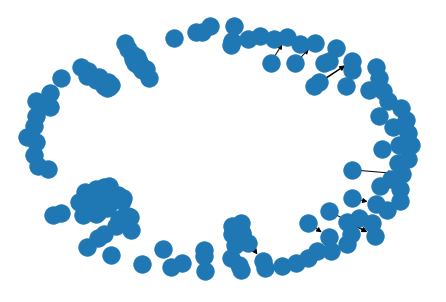

In [39]:
import networkx as nx
import matplotlib.pyplot as plt

g = nx.DiGraph()
g.add_nodes_from(keys)
# print(keys)

for i in dictEdge.keys():
    g.add_edge(i ,dictEdge.get(i))

nx.draw(g,with_labels=False)
plt.draw()
plt.show()



In [40]:
# with open("graph.txt",'w') as f:
#     for chain in chains:
#         for i in range(len(chain)-1):
#             if len(chain) > 1:
#                 f.write(str(chain[i][1]).replace(" ","")+" "+str(chain[i+1][1]).replace(" ","")+" 1\n")
#             else:
#                 f.write(str(chain[i][1]).replace(" ","")+str(chain[i][1]).replace(" ","")+" 1\n")

with open("graph.txt",'w') as f:
    for i in dictEdge.keys():
        if len(flows.get(i)) > 1:
            f.write(str(i).replace(" ","")+" "+str(dictEdge.get(i)).replace(" ","")+" 1\n")
        else:
            f.write(str(i).replace(" ","")+str(dictEdge.get(i)).replace(" ","")+" 1\n")

        
    